## In this notebook I load and explore sea lion data from SA
### I am trying to find if there is anything worth it for us to use. 
### The domain used is the one from Paul's paper van Ruth et al, 2010.
###
#### THINGS TO TRY:
#### - find mooring seals
#### - find transect seals
#### - a snapshot of the whole region every 100m. Try monthly, then just Nov-Apr (upwelling season), then year. 
####
### Import necessary packages

In [72]:
pip install cmocean

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import xarray as xr
import cmocean


from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from datetime import datetime


#### Load csv file that contains the sea lion data

In [2]:
# Replace 'your_file.csv' with the actual file path
file_path = 'C:\\Users\\nribeiro\\OneDrive - University of Tasmania\\IMOS Shared Docs\\SA vs Polar Vortex\\ohw23_proj_SAupwelling\\Datasets\\IMOS_sea_lion_delayed_data.csv'

#I had to add this line because I was getting an error while importing that this column had mixed types. 
dtype_options = {'device_wmo_ref': 'object'}


# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, dtype=dtype_options)
# Display the DataFrame
df.head()



,FID,measurement_id,profile_id,file_id,sattag_program,device_id,device_wmo_ref,ptt,tag_type,common_name,...,lon,lat,pressure,temp_vals,sal_vals,sal_corrected_vals,fluoro_vals,cond_vals,geom,colour
0,aatams_sattag_dm_profile_data.fid-6563a1a9_18d...,88534330,5681022,23,ct106,ct106-614-12,Q9900688,123170,SMRU SRDL CTD-Fluorometer,Australian Sea Lion,...,134.0279,-34.1229,2.0,18.776,35.803,35.803,0.465,NaN,POINT (134.027935006046 -34.1229350060459),#08115D
1,aatams_sattag_dm_profile_data.fid-6563a1a9_18d...,88534331,5681022,23,ct106,ct106-614-12,Q9900688,123170,SMRU SRDL CTD-Fluorometer,Australian Sea Lion,...,134.0279,-34.1229,5.2,18.762,35.802,35.802,0.499,NaN,POINT (134.027935006046 -34.1229350060459),#08115D
2,aatams_sattag_dm_profile_data.fid-6563a1a9_18d...,88534332,5681022,23,ct106,ct106-614-12,Q9900688,123170,SMRU SRDL CTD-Fluorometer,Australian Sea Lion,...,134.0279,-34.1229,8.4,18.762,35.800,35.800,0.508,NaN,POINT (134.027935006046 -34.1229350060459),#08115D
3,aatams_sattag_dm_profile_data.fid-6563a1a9_18d...,88534333,5681022,23,ct106,ct106-614-12,Q9900688,123170,SMRU SRDL CTD-Fluorometer,Australian Sea Lion,...,134.0279,-34.1229,11.6,18.762,35.802,35.802,0.549,NaN,POINT (134.027935006046 -34.1229350060459),#08115D
4,aatams_sattag_dm_profile_data.fid-6563a1a9_18d...,88534334,5681022,23,ct106,ct106-614-12,Q9900688,123170,SMRU SRDL CTD-Fluorometer,Australian Sea Lion,...,134.0279,-34.1229,14.8,18.762,35.805,35.805,0.556,NaN,POINT (134.027935006046 -34.1229350060459),#08115D


#### Convert the time column to datetime format



In [3]:
df['time'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')


#### Extract month & year from the datetime column


In [4]:
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [15]:
unique_years = df['year'].unique()
unique_month = df['month'].unique()

In [16]:
#we have 12 years available
unique_years

array([2014, 2013, 2015, 2016, 2017, 2018, 2008, 2007, 2009, 2010, 2011,
       2012], dtype=int64)

In [19]:
#we have 11 years available
unique_month

array([ 3,  4,  5,  6,  7, 12,  1,  2, 11,  8,  9], dtype=int64)

#### Convert datetime values to numerical timestamps


In [20]:
df['time_numeric'] = df['time'].values.astype(float)

#### Convert datetime values to numerical timestamps using mdates.date2num


In [21]:
df['time_numeric'] = mdates.date2num(df['time'])

#### Plot a pleliminary map with all data points coloured by time

C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


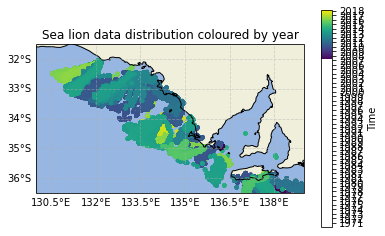

In [28]:
# Set up the map with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_xlim(130, 139)
ax.set_ylim(-36.5, -31.5)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.coastlines()

# Plot the dots on the map, color-coded by time
sc = ax.scatter(df['lon'], df['lat'],
                c=df['time_numeric'], cmap='viridis',
                marker='o', s=10, transform=ccrs.PlateCarree())

# Add colorbar
norm = Normalize(df['time_numeric'].min(), df['time_numeric'].max())
sm = ScalarMappable(norm=norm, cmap='viridis')
sm.set_array([])  # An empty array is required

# Create a colorbar with the discrete colors
cbar = plt.colorbar(sm, ticks=np.arange(0, 11), format="%d")
cbar.set_label('Time')

# Set tick positions and labels
cbar.set_ticks(np.arange(0.5, 11.5, 1))  # Position ticks at the center of each color block
cbar.set_ticklabels(np.arange(0, 11))  # Set tick labels


# Format colorbar ticks as years
years_locator = mdates.YearLocator()
cbar.ax.yaxis.set_major_locator(years_locator)
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add latitude and longitude labels
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Customize gridlines to show only on the left and bottom sides
gl = ax.gridlines(draw_labels=True,
                  linestyle='--', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False

plt.title('Sea lion data distribution coloured by year')
plt.show()

C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\nribeiro\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is d

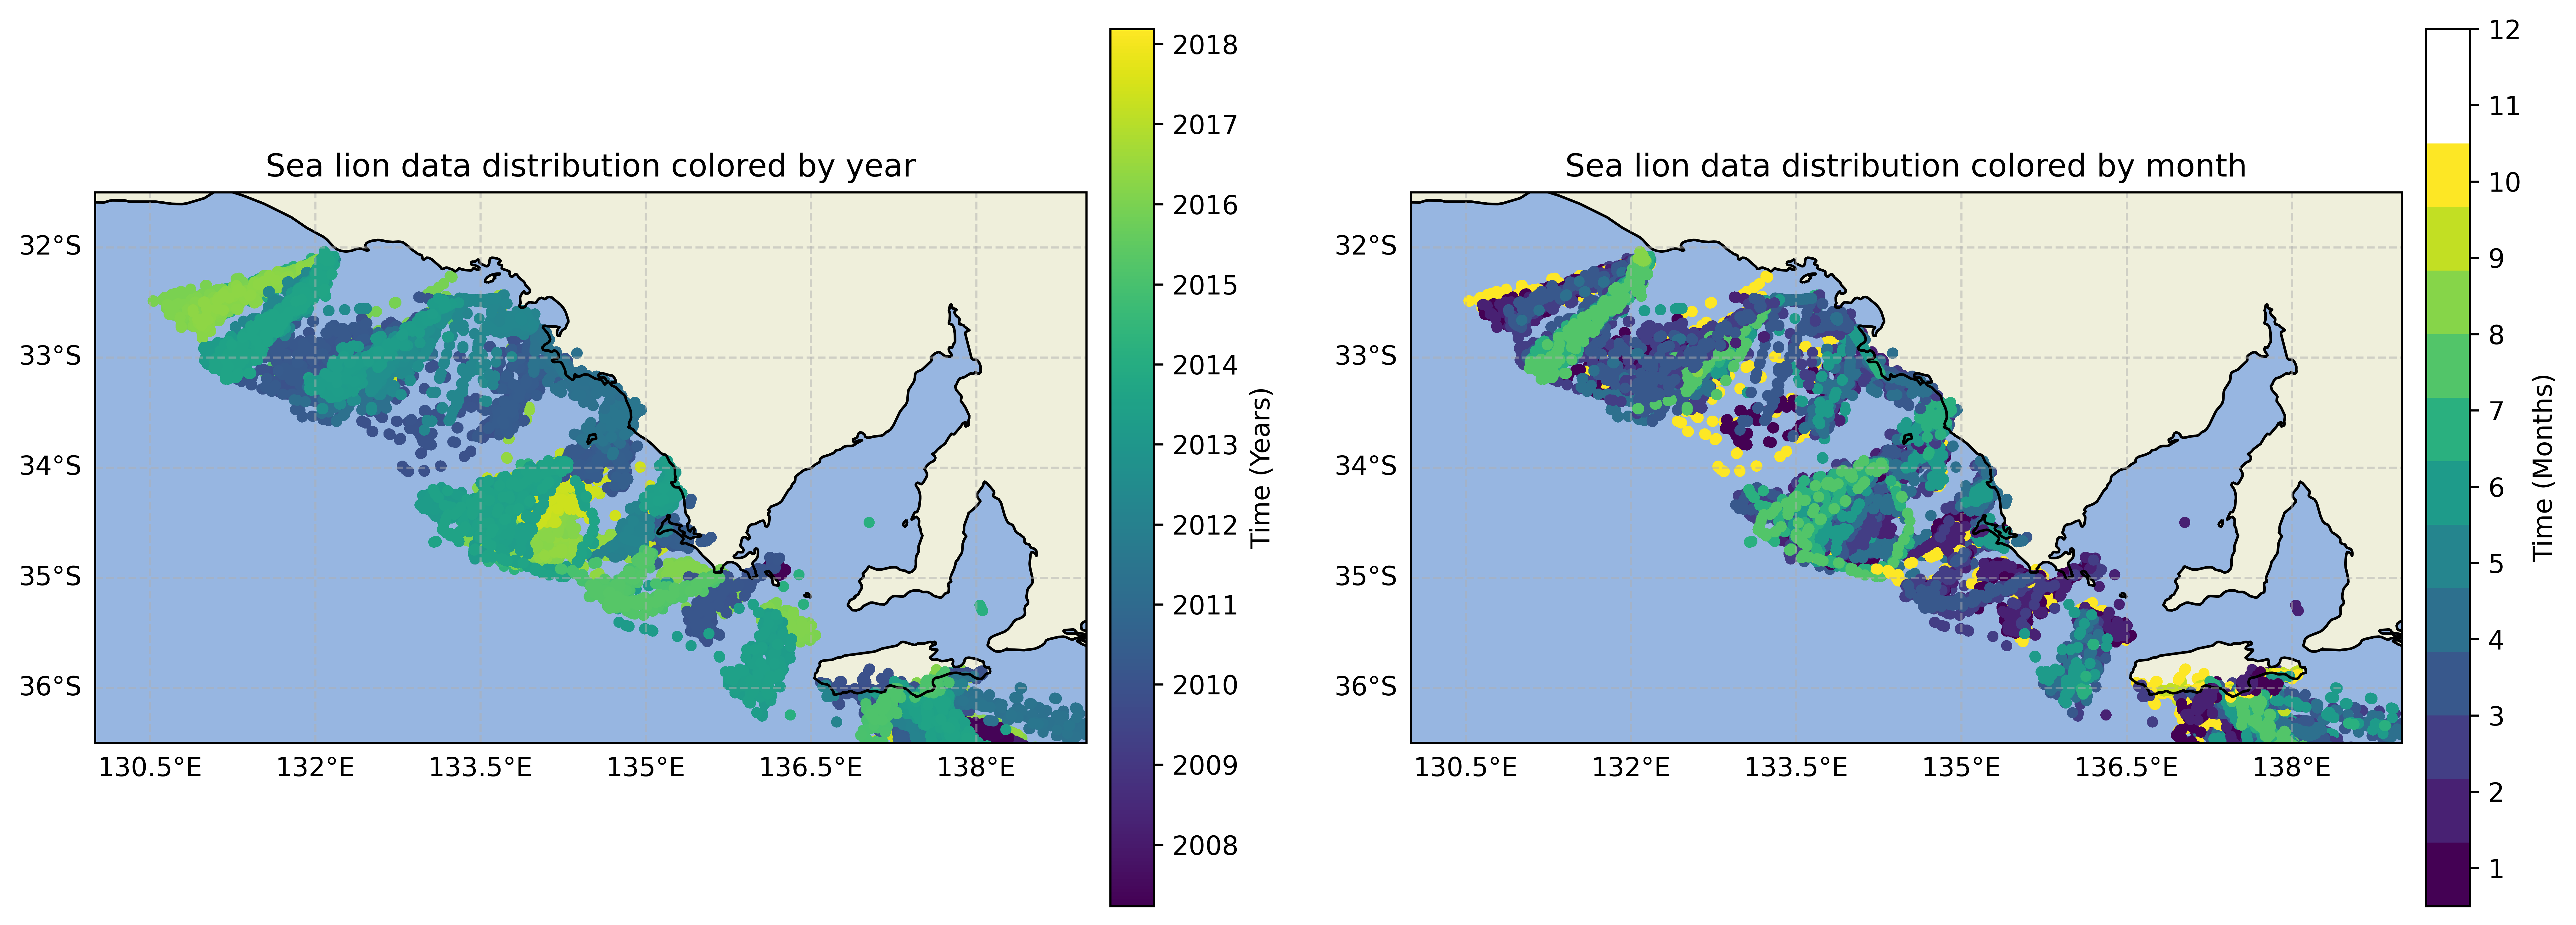

In [39]:
# Set up the map with Cartopy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# First subplot: Data colored by years
ax1.set_xlim(130, 139)
ax1.set_ylim(-36.5, -31.5)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.coastlines()

sc1 = ax1.scatter(df['lon'], df['lat'],
                  c=df['time_numeric'], cmap='viridis',
                  marker='o', s=10, transform=ccrs.PlateCarree())

norm1 = Normalize(df['time_numeric'].min(), df['time_numeric'].max())
sm1 = ScalarMappable(norm=norm1, cmap='viridis')
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax1, orientation='vertical', pad=0.02, label='Time (Years)')

years_locator = mdates.YearLocator()
cbar1.ax.yaxis.set_major_locator(years_locator)
cbar1.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

gl1 = ax1.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl1.xlabels_top = False
gl1.ylabels_right = False

ax1.set_title('Sea lion data distribution colored by year')

# Second subplot: Data colored by months
ax2.set_xlim(130, 139)
ax2.set_ylim(-36.5, -31.5)
ax2.add_feature(cf.LAND)
ax2.add_feature(cf.OCEAN)
ax2.coastlines()

# Convert months to categorical for discrete color representation
num_categories = 12
colors = plt.cm.viridis(np.linspace(0, 1, 12))
cmap = ListedColormap(colors)

sc2 = ax2.scatter(df['lon'], df['lat'],
                  c=df['month'].cat.codes, cmap=cmap,
                  marker='o', s=10, transform=ccrs.PlateCarree())

cbar2 = plt.colorbar(sc2, ax=ax2, orientation='vertical', pad=0.02, ticks=np.arange(13))
cbar2.set_ticks(np.arange(0.5, 12.5, 1))  # Position ticks at the center of each color block
cbar2.set_ticklabels(np.arange(1, 13))  # Set tick labels
cbar2.set_label('Time (Months)')


ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

gl2 = ax2.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl2.xlabels_top = False
gl2.ylabels_right = False

ax2.set_title('Sea lion data distribution colored by month')

plt.tight_layout()
plt.show()

#plt.rcParams['figure.dpi'] = 600    
#plt.gcf().savefig("../Figures/sea_lion_time_distribution.png") # save figure


In [30]:
num_categories

11

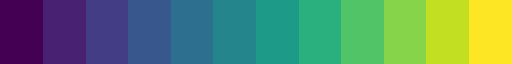

In [41]:
cmap

In [40]:
df['month'].cat.codes

0         2
1         2
2         2
3         2
4         2
         ..
610371    1
610372    1
610373    1
610374    1
610375    1
Length: 610376, dtype: int8

In [ ]:
# Convert months to categorical for discrete color representation
df['month'] = pd.Categorical(df['month'])
num_categories = len(df['month'].cat.categories)
colors = plt.cm.viridis(np.linspace(0, 1, num_categories))
cmap = ListedColormap(colors)

sc2 = ax2.scatter(df['lon'], df['lat'],
                  c=df['month'].cat.codes, cmap=cmap,
                  marker='o', s=10, transform=ccrs.PlateCarree())

cbar2 = plt.colorbar(sc2, ax=ax2, orientation='vertical', pad=0.02, ticks=np.arange(num_categories))
cbar2.set_ticklabels(df['month'].cat.categories)
cbar2.set_label('Time (Months)')
